In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression




<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
II. Data Understanding</p><br>

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Load a Dataframe:</p><br>

In [2]:
train = pd.read_csv('KDDTrain+.txt')
test = pd.read_csv('KDDTest+.txt')

In [3]:
column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
train.columns=column_names
test.columns=column_names
train = train.drop('level',axis=1)
test = test.drop('level',axis=1)


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
1.Informations sur dataset</p><br>

In [4]:
print("Taille initial du dataset train :",train.shape)
print("Taille initial du dataset train :",test.shape)

Taille initial du dataset train : (125972, 42)
Taille initial du dataset train : (22543, 42)


In [8]:
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [9]:
test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [10]:
train.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal


In [11]:
test.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22539,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal
22542,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,21,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,mscan


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    la plupart des column sont de type quantitatif ( 'int64' ou 'float64' ) 
Les columns qualitative de type objet incluent probablement des informations telles que le type 
de protocole (protocol_type), le service (service), le drapeau (flag), et le type d'attaque (attack). <br>
La variable cible de notre ensemble de données semble être la colonne attack, qui vas être utilisée 
dans des tâches de classification pour prédire le type d'attaque associé à chaque entrée.
    </div>

In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


*la plupart des valeurs pour plusieurs variables comme "duration,land,wrong_fragment,urgent,hot,num_failed_logins,num_compromised...." sont concentrées autour de zéro, avec une moyenne relativement faible, mais une valeur maximale élevée.

*toutes les valeurs dans la colonne "num_outbound_cmds" sont égales à zéro. Cette caractéristique ne semble donc pas contenir d'informations utiles pour la modélisation ou la prise de décision

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Information:</strong> <br>
count : Le nombre d'entrées non nulles dans la colonne. <br>

mean : La valeur moyenne des données de la colonne. <br>
std : L'écart-type, qui mesure la dispersion des données autour de la moyenne.  <br>
min : La valeur minimale de la colonne. <br>
25% : Le premier quartile,la valeur au-dessous de laquelle se trouvent 25 % des données lorsqu'elles sont arrangées en ordre croissant. <br>
50% : La médiane est la valeur centrale d'un ensemble de données triées par ordre croissant. <br>
75% : Le troisième quartile,la valeur au-dessous de laquelle se trouvent 75 % des données arrangées en ordre croissant. <br>
max : La valeur maximal de la colonne. <br>
</div>

In [14]:
train.describe(include="object")

,protocol_type,service,flag,attack
count,125972,125972,125972,125972
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102688,40338,74944,67342


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Information:</strong> <br>
count : Le nombre d'entrées non nulles dans la colonne. <br>

unique : Le nombre de catégories uniques dans la colonne <br>
top : La catégorie la plus fréquente <br>
freq : Le nombre d'occurrences de la catégorie la plus fréquente <br>
</div>

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Vérification de l'équilibrage du notre dataset:</p><br>

<AxesSubplot:xlabel='attack', ylabel='count'>

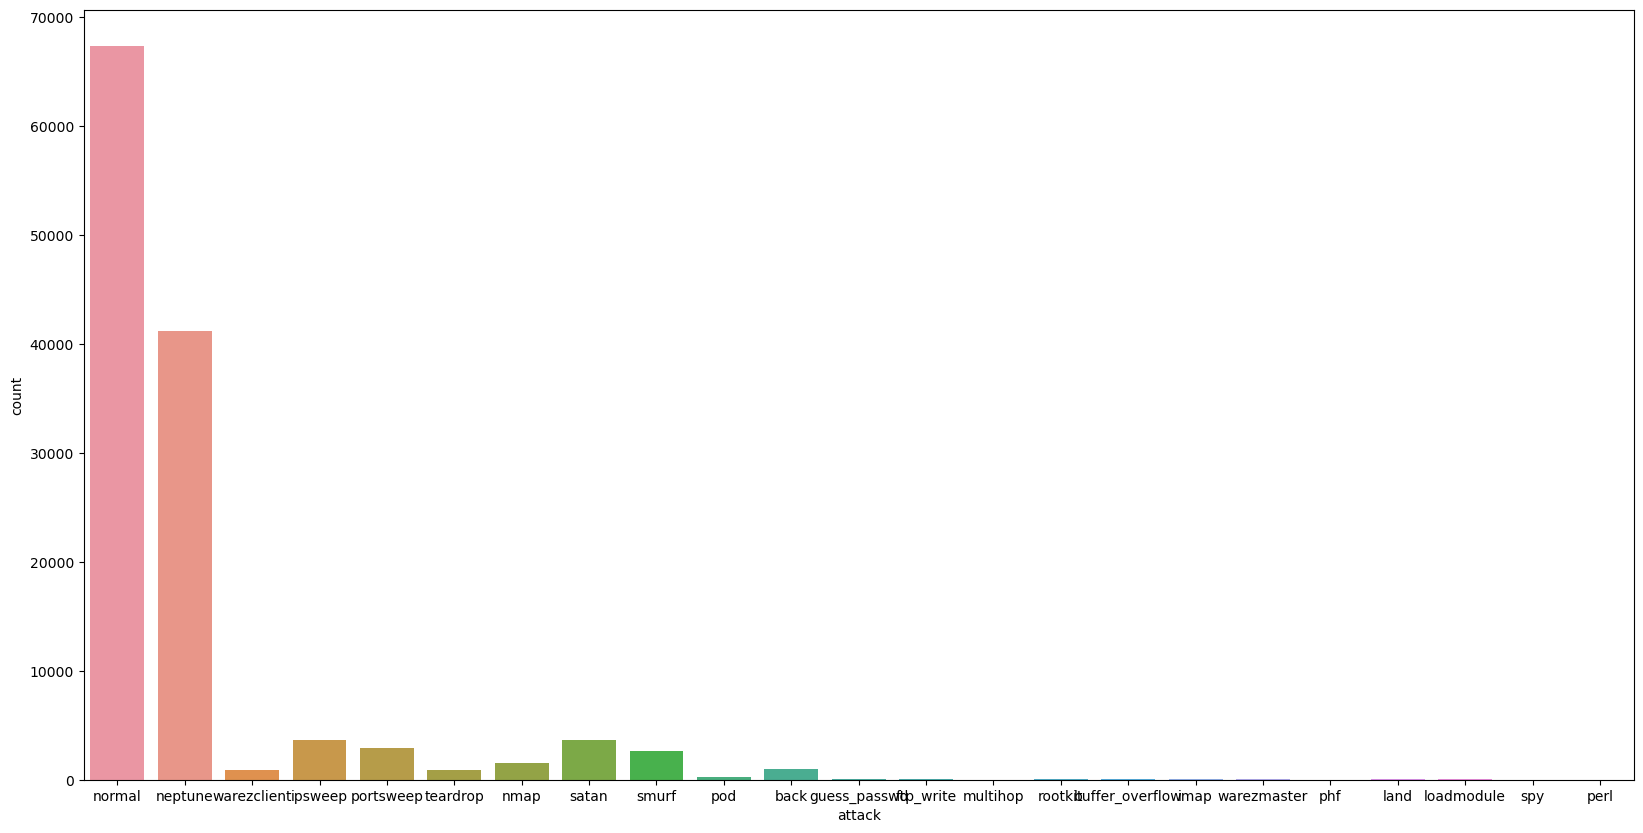

In [15]:
plt.figure(figsize=(20, 10))
sns.countplot(x=train['attack'])

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    la distribution des étiquettes de la variable cible 'attack' montre que la classe 'normal' est significativement 
prédominante, représentant environ 53,46% de l'ensemble de données.  <br>
Les autres classes d'attaques ont des pourcentages beaucoup plus faibles, avec des variations allant de 32,47% 
à seulement 0,01%. <br>
    Cette observation suggère un déséquilibre marqué dans les classes de notre ensemble de données. 
    </div>

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
III. Data Preparation</p><br>

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
1.Data Cleaning</p><br>

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Duplicate values</p><br>

In [16]:
duplicates = train[train.duplicated()]
print(f"Nombre total de lignes dupliquées : {len(duplicates)}")

Nombre total de lignes dupliquées : 0


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    Il est observé qu'il n'y a aucune ligne dupliquée.
    </div>


<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Missing values</p><br>

In [17]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

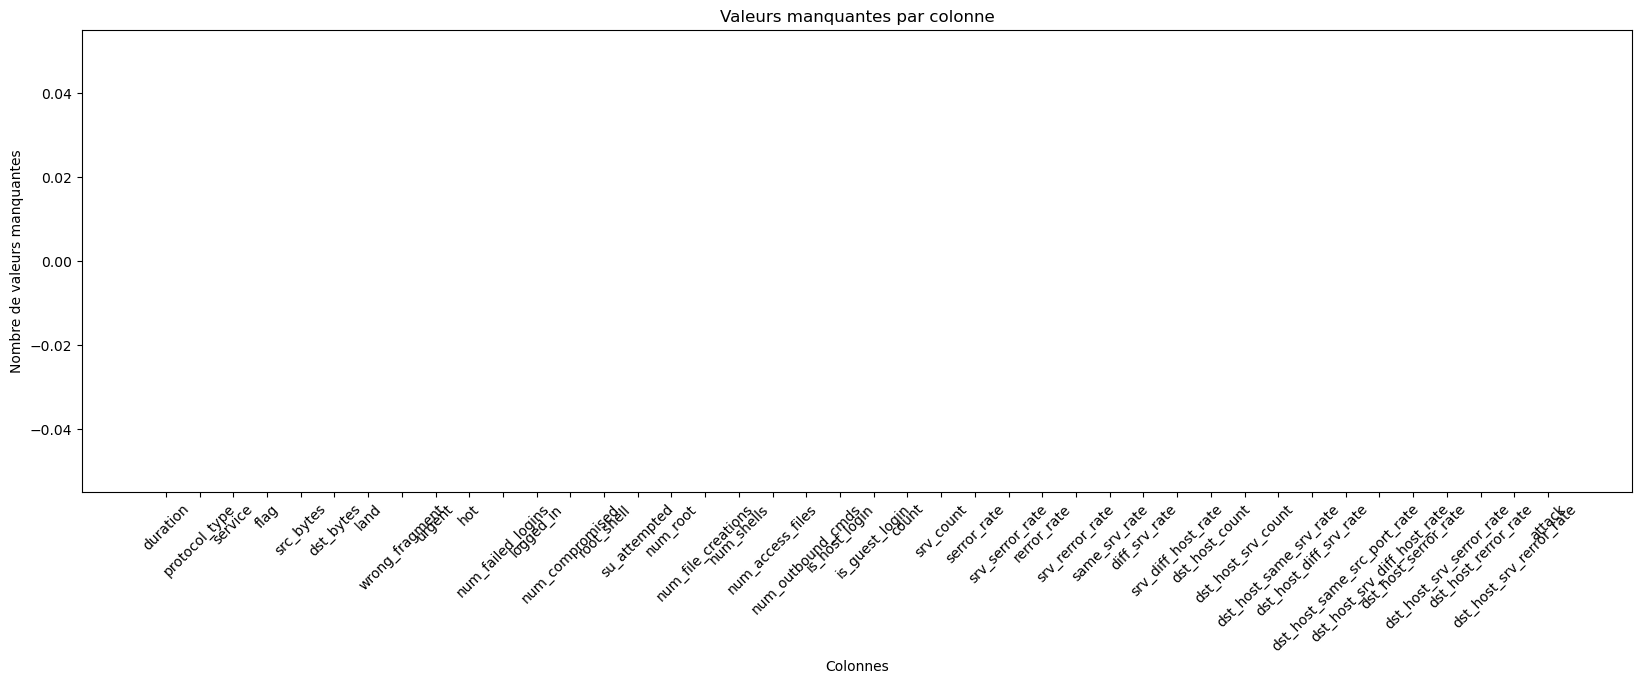

In [18]:
missing_mask = train.isnull()
missing_count = missing_mask.sum()
plt.figure(figsize=(20, 6))
plt.bar(missing_count.index, missing_count)
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Valeurs manquantes par colonne')
plt.xticks(rotation=45)  # Incliner les étiquettes de l'axe x pour une meilleure lisibilité
plt.show()


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    Il est observé que notre dataset ne contient aucune valeur manquante.
    </div>


<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Outliers</p><br>

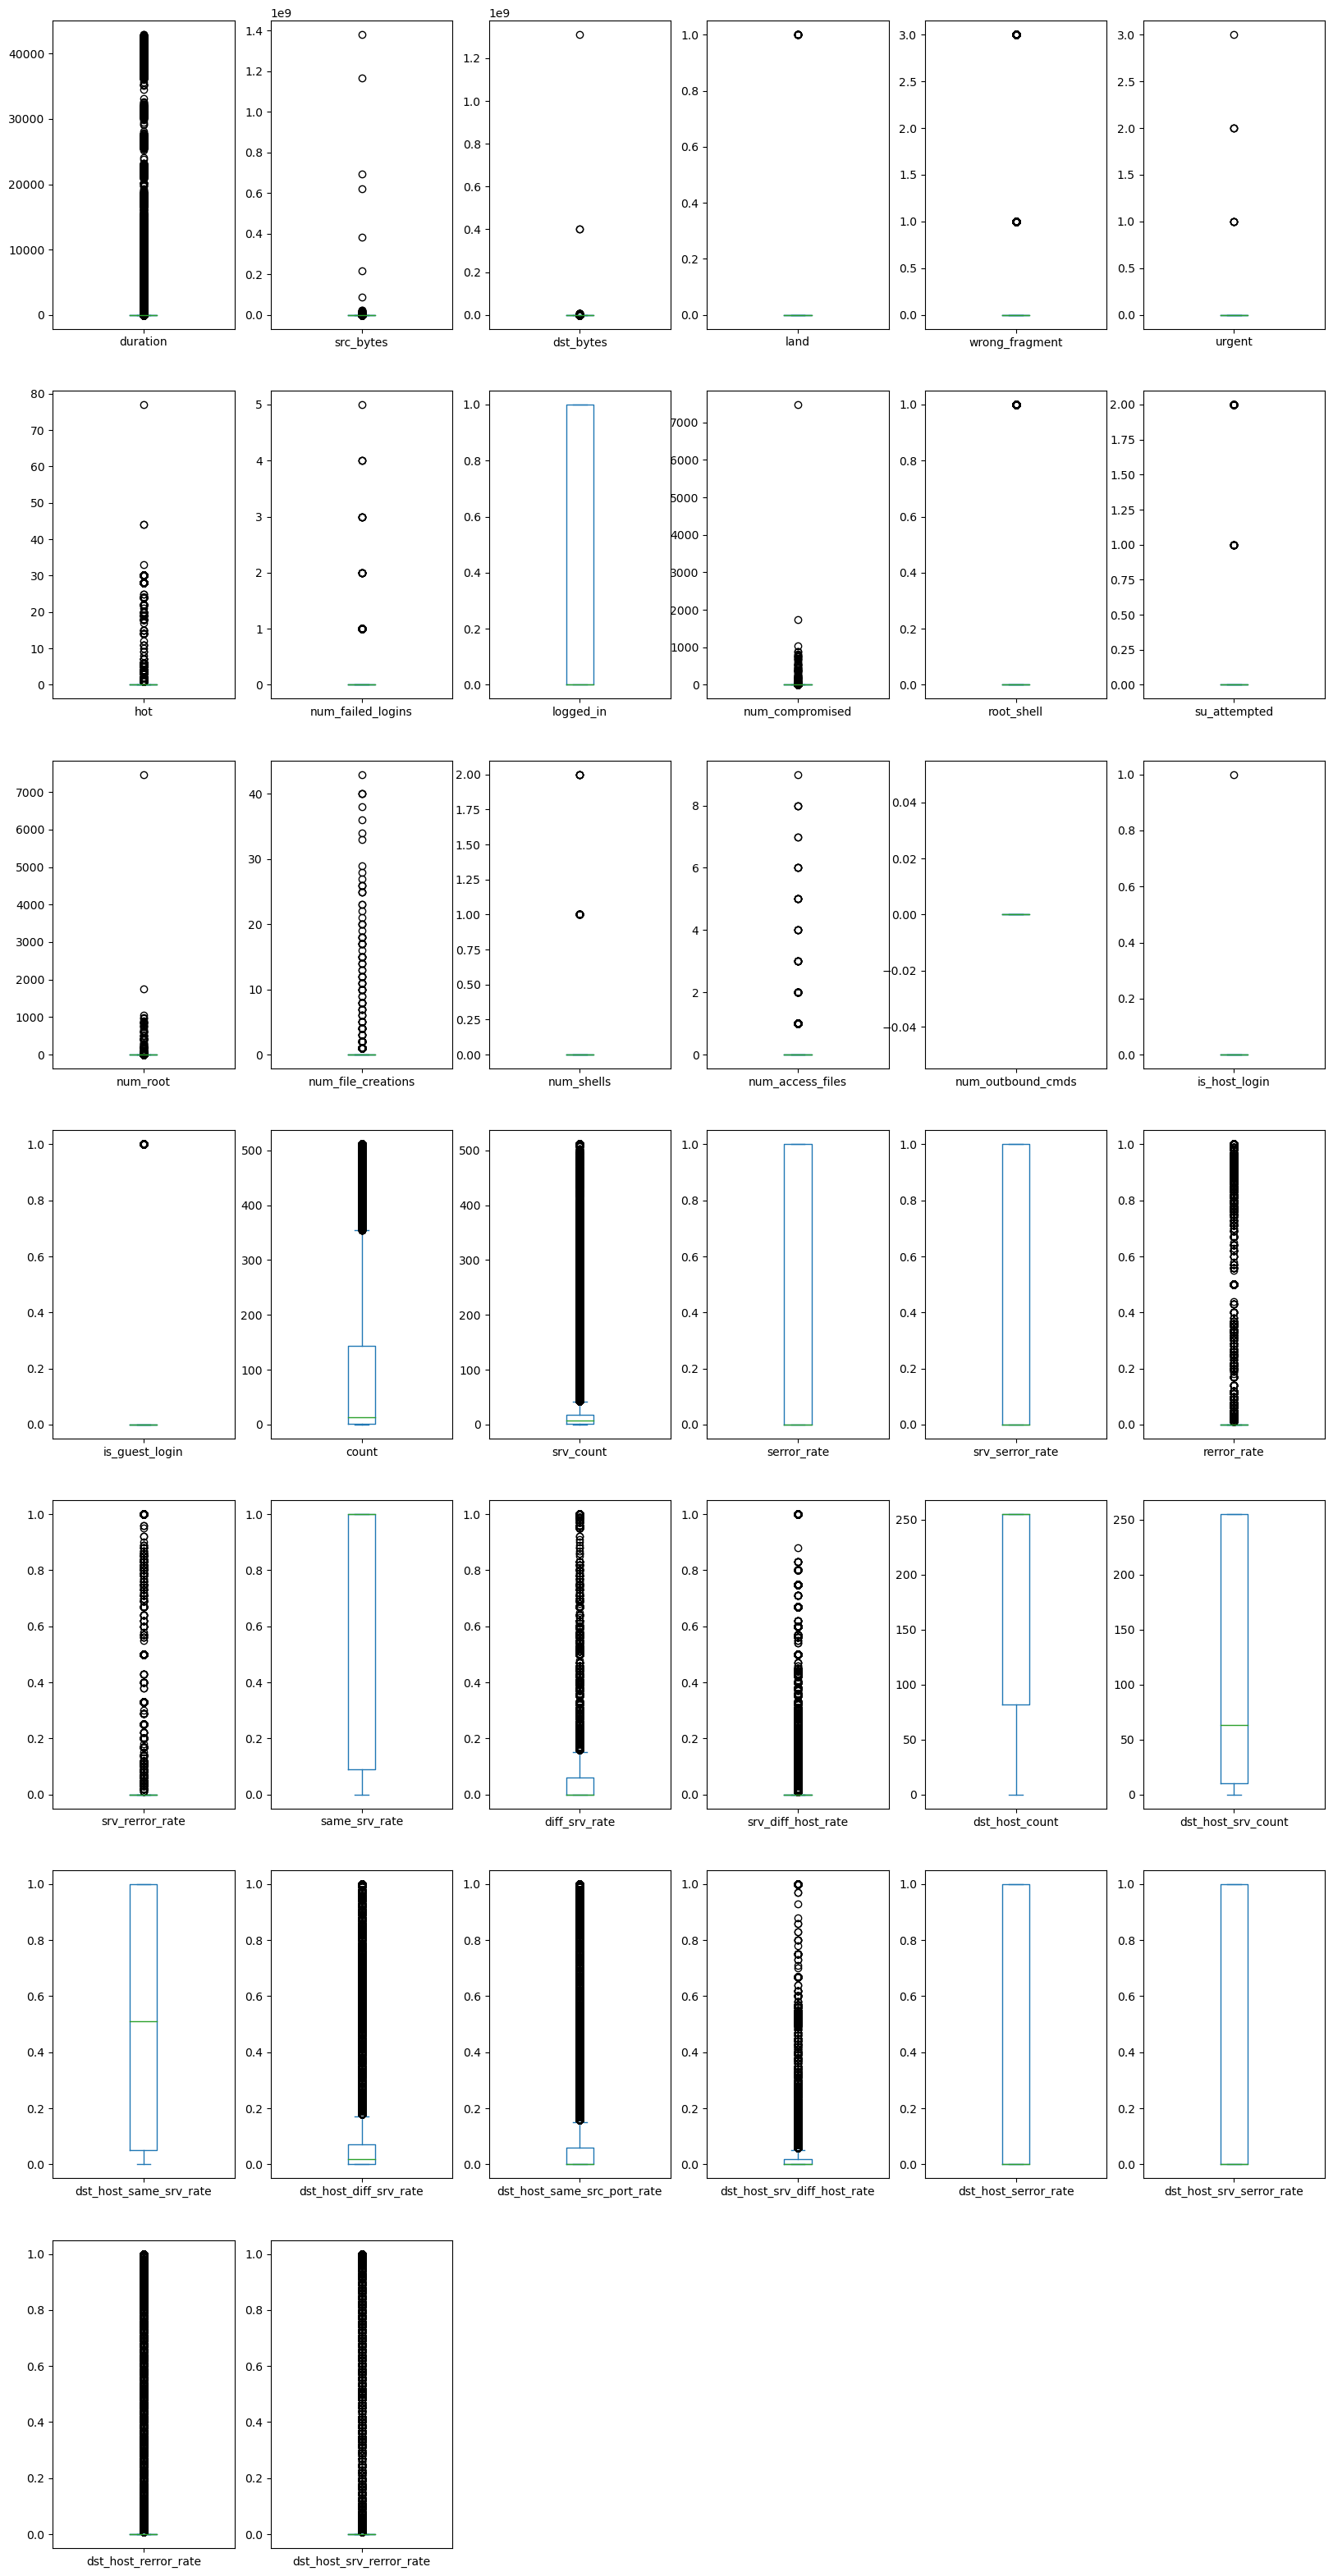

In [19]:
#Visualisation du trainset
train.plot(kind='box', subplots=True, layout=(7, 6), figsize=(20, 40))
plt.show()


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Observation:</strong> <br>
    Il est observé que notre dataset contient plusieurs outliers donc on va chercher <br>
    la methode adequate pour eliminer ces valeurs .
    </div>

In [8]:
def detect_outliers_iqr(data, threshold=1.5):
    outliers_info = {}

    for column in data.columns:
        if data[column].dtype in [int, float]:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            
            if not column_outliers.empty:
                num_outliers = len(column_outliers)
                percent_outliers = (num_outliers / len(data)) * 100
                outliers_info[column] = {"outliers_df": column_outliers, "num_outliers": num_outliers, "percent_outliers": percent_outliers}

    return outliers_info

outliers_info = detect_outliers_iqr(train)

# Afficher les colonnes avec des valeurs aberrantes, le nombre de valeurs aberrantes, et le pourcentage de valeurs aberrantes
for column, info in outliers_info.items():
    print(f"Outliers in column '{column}': {info['num_outliers']} outliers ({info['percent_outliers']:.2f}%)")
    #print(info['outliers_df'].head())
    #print("\n")


Outliers in column 'rerror_rate': 16190 outliers (12.85%)
Outliers in column 'srv_rerror_rate': 16206 outliers (12.86%)
Outliers in column 'diff_srv_rate': 7788 outliers (6.18%)
Outliers in column 'srv_diff_host_rate': 28399 outliers (22.54%)
Outliers in column 'dst_host_diff_srv_rate': 10550 outliers (8.37%)
Outliers in column 'dst_host_same_src_port_rate': 25051 outliers (19.89%)
Outliers in column 'dst_host_srv_diff_host_rate': 11682 outliers (9.27%)
Outliers in column 'dst_host_rerror_rate': 22794 outliers (18.09%)
Outliers in column 'dst_host_srv_rerror_rate': 19357 outliers (15.37%)


In [9]:
#Remplacement des outliers
def replace_outliers_with_quantile(data, threshold=0.99):
    cleaned_data = data.copy()

    # Storage des outliers before and after
    outliers_count = {'Before': {}, 'After': {}}

    for column in data.columns:
        if np.issubdtype(data[column].dtype, np.number):
            # Determiner la valeur du quantile
            quantile_value = data[column].quantile(threshold)

            # Compter les outliers avant replacement
            outlier_indices_before = data[column] > quantile_value
            outliers_count['Before'][column] = outlier_indices_before.sum()

            if outlier_indices_before.any():
                cleaned_data[column] = np.where(outlier_indices_before, quantile_value, cleaned_data[column])

            # Compter les outliers après replacement
            outlier_indices_after = cleaned_data[column] > quantile_value
            outliers_count['After'][column] = outlier_indices_after.sum()

    return cleaned_data, outliers_count

before_replacement = train.copy()

#Application de la fonction des outliers train 
train_after, outliers_count = replace_outliers_with_quantile(train)
#Affichage des outliers before and after
print("Outliers Count:")
print(pd.DataFrame(outliers_count))

Outliers Count:
                             Before  After
duration                       1260      0
src_bytes                       588      0
dst_bytes                      1258      0
land                             25      0
wrong_fragment                 1090      0
urgent                            9      0
hot                            1211      0
num_failed_logins               122      0
logged_in                         0      0
num_compromised                 310      0
root_shell                      169      0
su_attempted                     80      0
num_root                        649      0
num_file_creations              287      0
num_shells                       47      0
num_access_files                371      0
num_outbound_cmds                 0      0
is_host_login                     1      0
is_guest_login                 1187      0
count                             0      0
srv_count                      1259      0
serror_rate                       0   

In [22]:
#Application de la fonction des outliers  test
train_after, outliers_count = replace_outliers_with_quantile(test)


#Affichage des outliers before and after
print("Outliers Count:")
print(pd.DataFrame(outliers_count))


Outliers Count:
                             Before  After
duration                        226      0
src_bytes                        11      0
dst_bytes                       226      0
land                              7      0
wrong_fragment                  100      0
urgent                           10      0
hot                              71      0
num_failed_logins                 5      0
logged_in                         0      0
num_compromised                  44      0
root_shell                       55      0
su_attempted                      4      0
num_root                         48      0
num_file_creations               42      0
num_shells                       19      0
num_access_files                 72      0
num_outbound_cmds                 0      0
is_host_login                    11      0
is_guest_login                    0      0
count                             0      0
srv_count                         0      0
serror_rate                       0   

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Interpretation:</strong> <br>
    Il est observé que notre dataset ne contient aucune outliers.
</div>

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
1.Matrice de correlation</p><br>

In [5]:
def correlation_matrix_heatMap(data_set):
    numeric_columns = data_set.select_dtypes(include=['int64', 'float64'])

   
    correlation_matrix = numeric_columns.corr()

    
    plt.figure(figsize=(30, 30))

    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

    
    plt.title('Correlation Matrix Heatmap')

    
    plt.show()




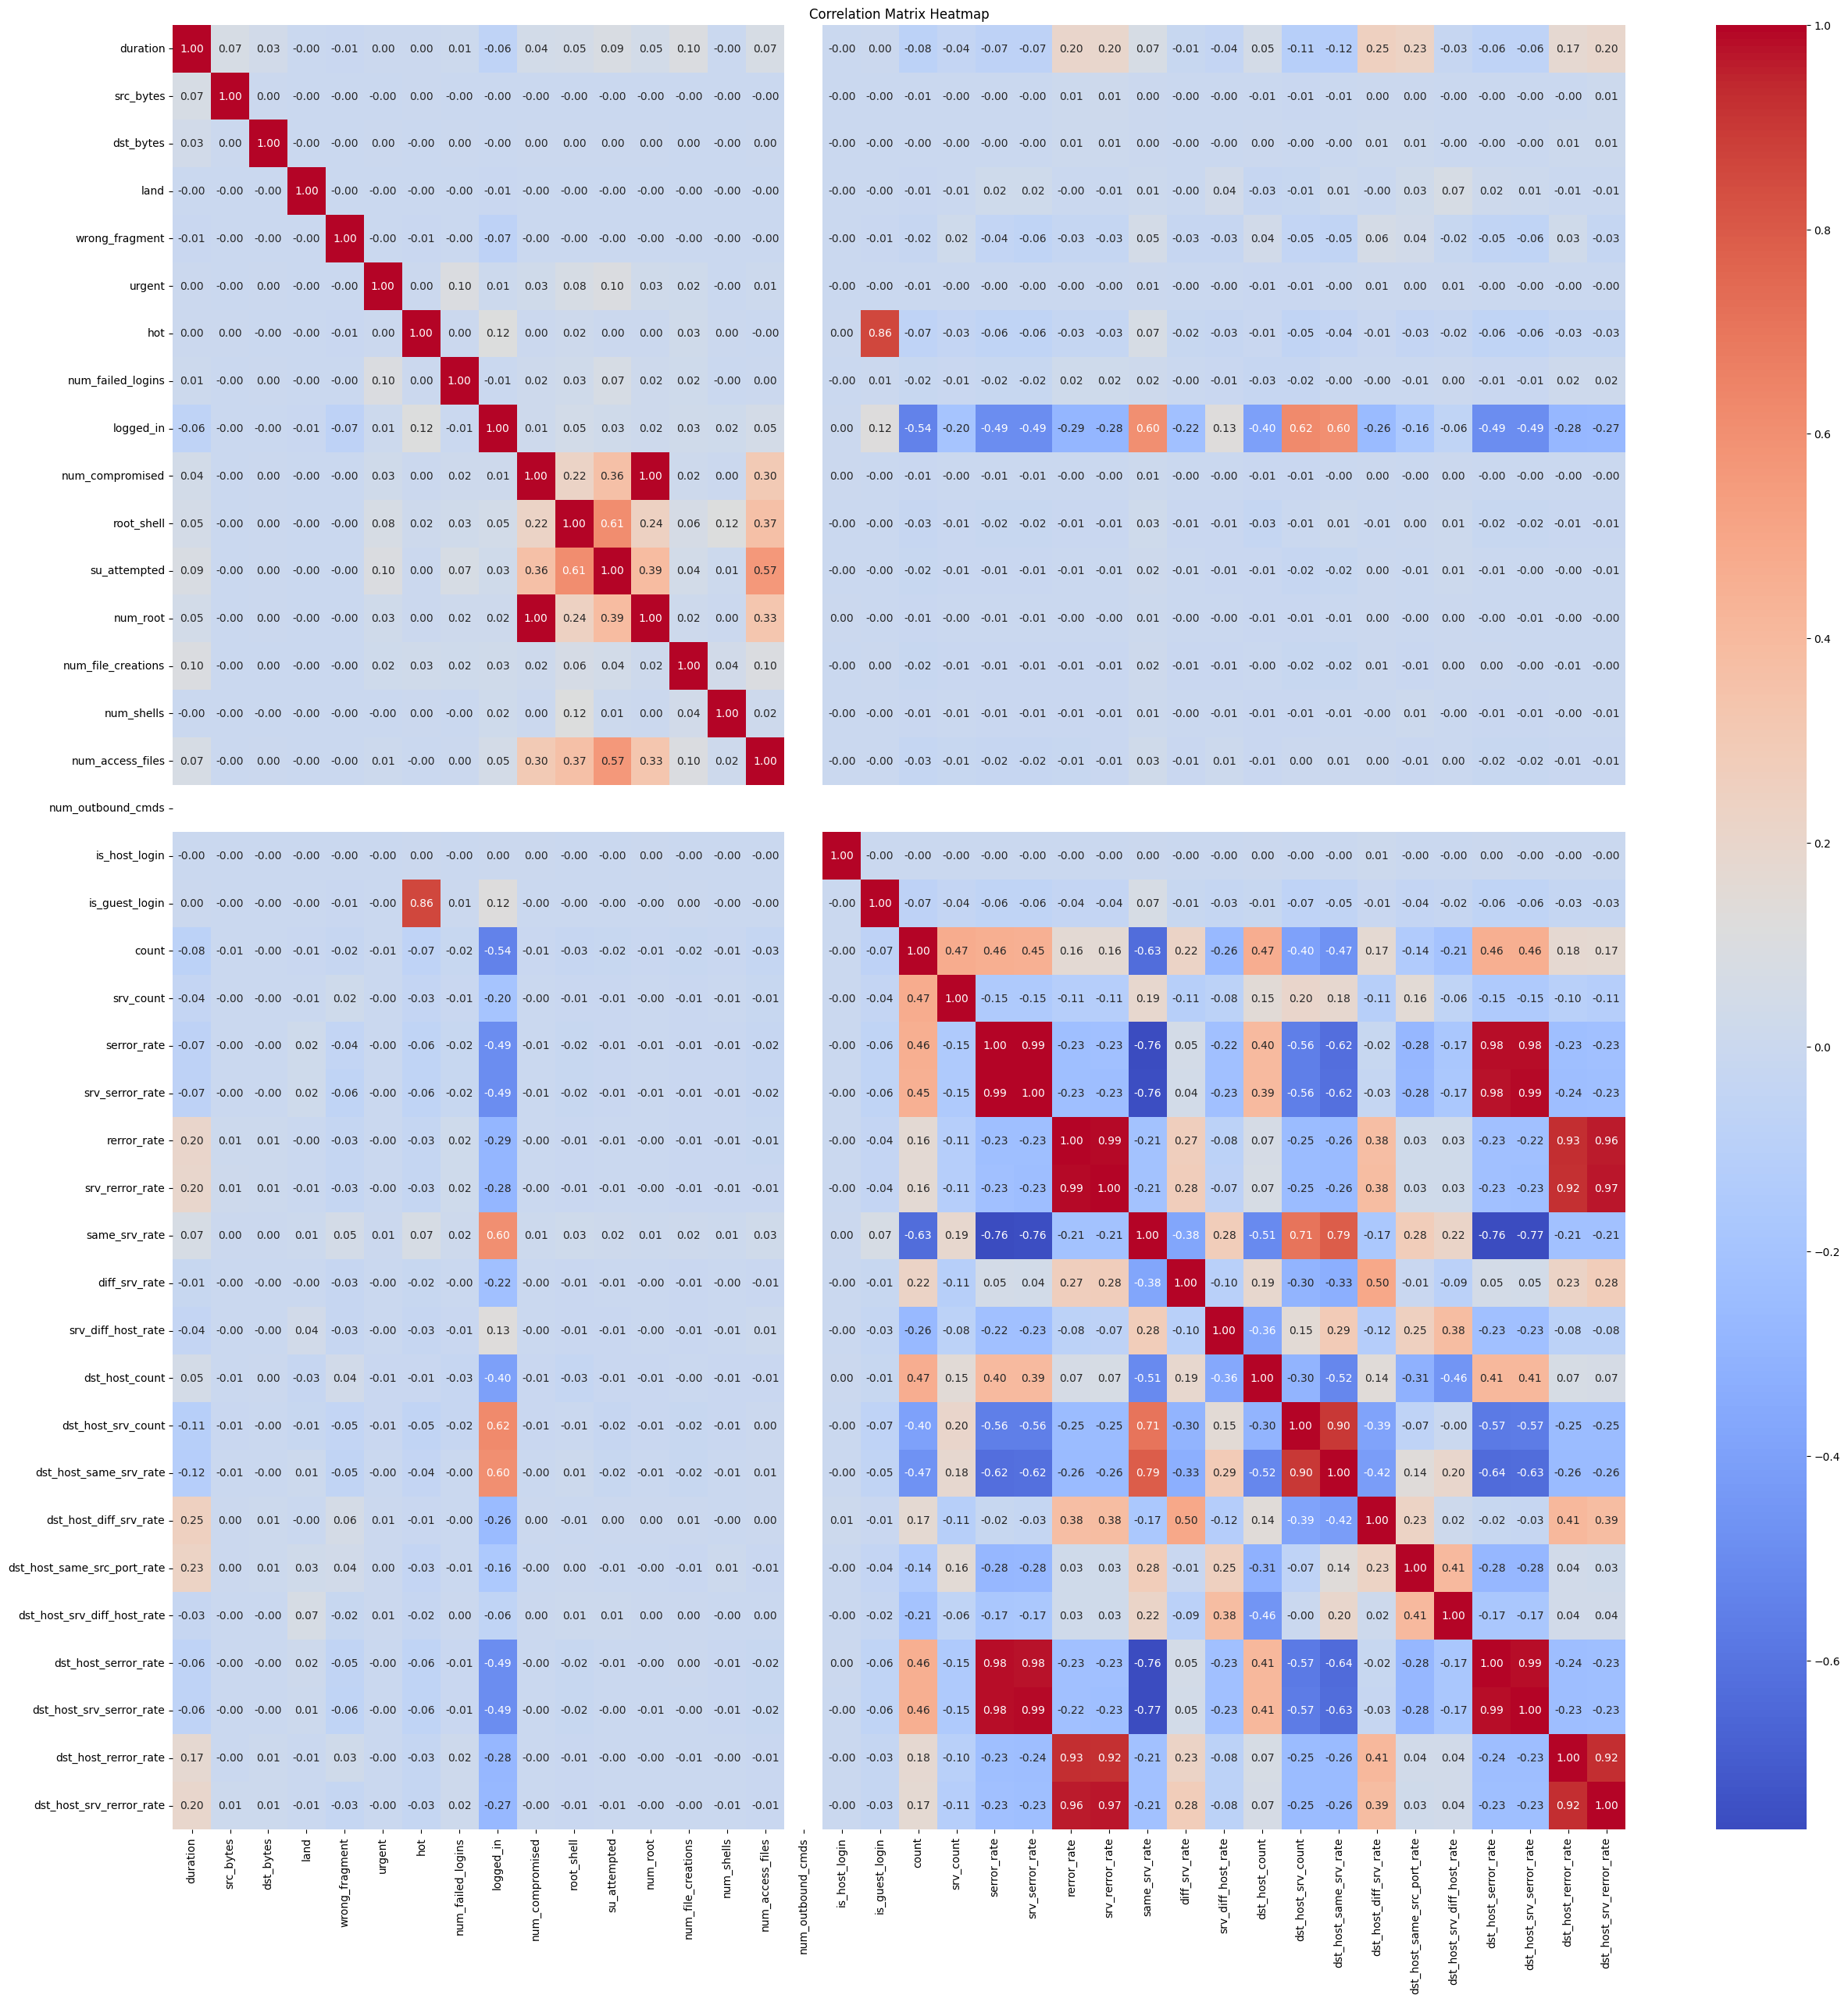

In [10]:
 # regrouping the data set together
correlation_matrix_heatMap(train)


In [15]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [11]:
print(train.nunique())

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [27]:
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Valeurs uniques pour la colonne {column}: {unique_values}")

Valeurs uniques pour la colonne duration: [    0  5607   507 ...  5430 11680   679]
Valeurs uniques pour la colonne protocol_type: ['udp' 'tcp' 'icmp']
Valeurs uniques pour la colonne service: ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
Valeurs uniques pour la colonne flag: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
Valeurs uniques pour la colonne src_bytes: [  146     0   232 ...  2816 11466  235

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
VI. Data transformation </p><br>


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
Target</p><br>

In [16]:
def change_label(train):
  train.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  train.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  train.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  train.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(train)
change_label(test)

In [18]:
train['attack'].value_counts()



normal    67342
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: attack, dtype: int64

In [19]:
test['attack'].value_counts()

normal    9711
Dos       7459
R2L       2885
Probe     2421
U2R         67
Name: attack, dtype: int64

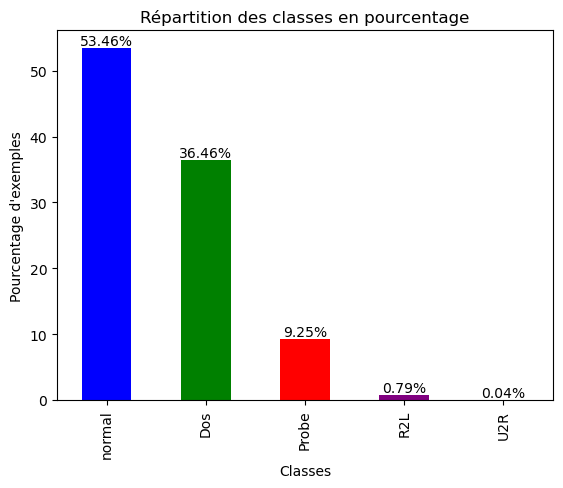

In [20]:
class_counts = train['attack'].value_counts()
class_percentages = (class_counts / len(train)) * 100
colors = ['blue',  'green', 'red', 'purple']
ax = class_percentages.plot(kind='bar', color=colors)
plt.xlabel('Classes')
plt.ylabel('Pourcentage d\'exemples')
plt.title('Répartition des classes en pourcentage')
for i, v in enumerate(class_percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Observation:</strong> <br>
    Regroupement des valeur de la column target attaque en catégories 'Dos', 'R2L', 'Probe', 'U2R'
    </div>

In [21]:
train.describe(include="object")

,protocol_type,service,flag,attack
count,125972,125972,125972,125972
unique,3,70,11,5
top,tcp,http,SF,normal
freq,102688,40338,74944,67342


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
Encodage</p><br>

In [33]:
train.describe(include="object")

,protocol_type,service,flag,attack
count,125972,125972,125972,125972
unique,3,70,11,5
top,tcp,http,SF,normal
freq,102688,40338,74944,67342


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    
Il est observé que la colonne "service" de notre ensemble de données présente 70 valeurs uniques ,et la colonne "flag" présente 11 valeurs uniques. Lorsque nous appliquons la technique de One-Hot Encoding à cette colonne, cela se traduit par la création de 88 nouvelles colonnes, chacune représentant une valeur unique dans la colonne d'origine. Cela augmenterait considérablement le nombre total d'entrées dans notre ensemble de données, passant ainsi à 134 colonnes après l'encodage. Cette expansion pourrait introduire une complexité accrue dans l'analyse du jeu de données, car la multiplication des colonnes peut rendre l'ensemble de données plus difficile à interpréter et à manipuler.    </div>

<div style="background-color: red; padding: 10px; border: 1px solid #f1c40f;">
Afin de résoudre ce défi de dimensionnalité tout en conservant l'information contenue dans les colonne "service" et "flag", nous avons décidé d'opter pour la méthode de Label Encoding. 
</div>

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
1.Encodage one-hot</p><br>

In [22]:
train = pd.get_dummies(train, columns=['protocol_type'], prefix='protocol')
bool_columns = train.select_dtypes(include='bool').columns
train[bool_columns] = train[bool_columns].astype(int)


In [23]:
test = pd.get_dummies(test, columns=['protocol_type'], prefix='protocol')
bool_columns = test.select_dtypes(include='bool').columns
test[bool_columns] = test[bool_columns].astype(int)


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Attention:</strong> <br>
L'Encodage one-hot augmente considérablement la dimensionnalité des données. <br>
Donc pour les autres on va utiliser LabelEncoder
   </div>

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
2.Label Encoder</p><br>

In [24]:
le = LabelEncoder()
train['attack']=le.fit_transform(train['attack'])
test['attack']=le.fit_transform(test['attack'])
train['flag']=le.fit_transform(train['flag'])
test['flag']=le.fit_transform(test['flag'])
train['service']=le.fit_transform(train['service'])
test['service']=le.fit_transform(test['service'])


In [25]:
train.head(50)

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,protocol_icmp,protocol_tcp,protocol_udp
0,0,44,9,146,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,4,0,0,1
1,0,49,5,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0,0,1,0
2,0,24,9,232,8153,0,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,4,0,1,0
3,0,24,9,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,4,0,1,0
4,0,49,1,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,0,0,1,0
5,0,49,5,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0,0,1,0
6,0,49,5,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0,0,1,0
7,0,51,5,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0,0,1,0
8,0,49,5,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0,0,1,0
9,0,49,1,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,0,0,1,0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   service                      125972 non-null  int32  
 2   flag                         125972 non-null  int32  
 3   src_bytes                    125972 non-null  int64  
 4   dst_bytes                    125972 non-null  int64  
 5   land                         125972 non-null  int64  
 6   wrong_fragment               125972 non-null  int64  
 7   urgent                       125972 non-null  int64  
 8   hot                          125972 non-null  int64  
 9   num_failed_logins            125972 non-null  int64  
 10  logged_in                    125972 non-null  int64  
 11  num_compromised              125972 non-null  int64  
 12  root_shell                   125972 non-null  int64  
 13 

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
3.Normalisation</p><br>

In [27]:
#Normalisation train
from sklearn.preprocessing import StandardScaler

# Sélectionner toutes les colonnes sauf la colonne 'attack'
features = train.drop('attack', axis=1)
# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation aux données sauf la colonne 'attack'
trainNormalized = train.copy()  # Créer une copie du DataFrame original
trainNormalized[features.columns] = scaler.fit_transform(features)
trainNormalized.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,protocol_icmp,protocol_tcp,protocol_udp
0,-0.11025,0.781420,0.751116,-0.007737,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,...,2.367729,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,4,-0.26543,-2.100057,2.720672
1,-0.11025,1.087297,-0.736227,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,...,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0,-0.26543,0.476178,-0.367556
2,-0.11025,-0.442088,0.751116,-0.007723,-0.002891,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,...,-0.383106,0.066249,-0.572087,-0.602436,-0.387635,-0.345086,4,-0.26543,0.476178,-0.367556
3,-0.11025,-0.442088,0.751116,-0.007728,-0.004814,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,...,-0.480194,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,4,-0.26543,0.476178,-0.367556
4,-0.11025,1.087297,-2.223571,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,...,-0.480194,-0.289105,-0.639535,-0.624874,2.874397,2.753901,0,-0.26543,0.476178,-0.367556


In [28]:
#Normalisation test
from sklearn.preprocessing import StandardScaler

# Sélectionner toutes les colonnes sauf la colonne 'attack'
features = test.drop('attack', axis=1)

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation aux données sauf la colonne 'attack'
testNormlize = test.copy()  # Créer une copie du DataFrame original
testNormlize[features.columns] = scaler.fit_transform(features)
testNormlize.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,protocol_icmp,protocol_tcp,protocol_udp
0,-0.155538,0.934002,-1.830131,-0.021989,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,...,-0.431868,-0.229986,-0.358127,-0.352758,1.980007,1.929318,0,-0.220254,0.440543,-0.362716
1,-0.154116,-0.882210,0.662209,0.005472,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,...,1.559859,0.004223,-0.358127,-0.352758,-0.602670,-0.565432,4,-0.220254,0.440543,-0.362716
2,-0.155538,-1.301336,0.662209,-0.021946,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,...,2.833257,3.048941,-0.358127,-0.352758,-0.602670,-0.565432,1,4.540222,-2.269926,-0.362716
3,-0.154827,1.632546,-1.518588,-0.021989,-0.096191,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,...,-0.333914,0.004223,-0.358127,-0.352758,1.540952,1.205841,1,-0.220254,0.440543,-0.362716
4,-0.155538,-0.672647,0.662209,-0.021424,0.587149,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,...,-0.399216,0.121328,-0.321515,-0.352758,-0.602670,-0.565432,4,-0.220254,0.440543,-0.362716


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
4.FEATURE SELECTION</p><br>

In [29]:
X_train = train.drop('attack', axis=1)  # Features
Y_train= train['attack']  # Target variable
X_test = test.drop('attack', axis=1)  # Features
Y_test= test['attack']  # Target variable


In [30]:
X_train_Normlized = trainNormalized.drop('attack', axis=1)  # Features
Y_train_Normlized = trainNormalized['attack']  # Target variable
X_test_Normlized = testNormlize.drop('attack', axis=1)  # Features
Y_test_Normlized = testNormlize['attack']  # Target variable


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
ANOVA F-test</p><br>

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Information:</strong> <br>
L'ANOVA F-test est couramment utilisé lorsque vous avez des caractéristiques continues et une variable cible catégorielle avec plusieurs niveaux. <br>
Cela peut être utile dans le processus de sélection des caractéristiques pour identifier celles qui sont les plus importantes pour expliquer les variations dans la variable cible. 
   </div>

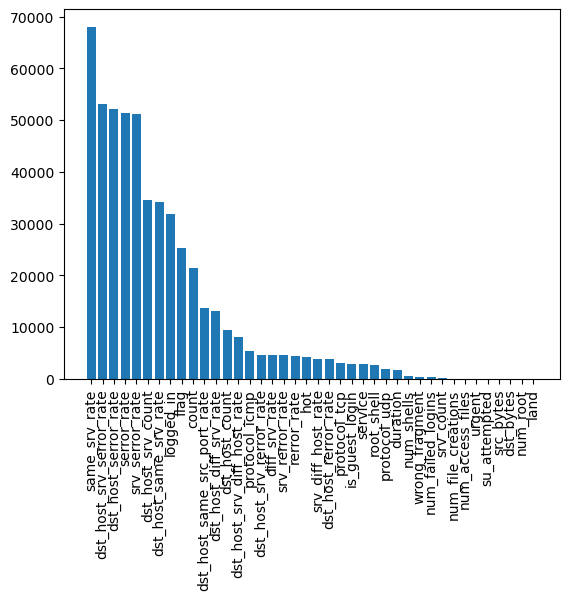

In [31]:
selector = SelectPercentile(f_classif, percentile=60)
X_train_selected_Normlized = selector.fit_transform(X_train_Normlized, Y_train_Normlized)
selected_features = X_train_Normlized.columns[selector.get_support()]
#print("Selected Features:", selected_features)
feature_scores = list(zip(selector.scores_, X_train_Normlized.columns))
sorted_feature_scores = sorted(feature_scores, reverse=True)
num_list = []
col_list = []
for i in range(40):
    num_list.append((sorted_feature_scores[i])[0])
    col_list.append((sorted_feature_scores[i])[1])


plt.bar(col_list, num_list)
plt.xticks(rotation=90)
plt.show()
X_train_selected_Normlized = X_train_Normlized[selected_features]
X_test_selected_Normlized = X_test_Normlized[selected_features]

In [32]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [33]:
X_train_selected_Normlized.info()
#X_test_selected_Normlized.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   service                      125972 non-null  float64
 1   flag                         125972 non-null  float64
 2   hot                          125972 non-null  float64
 3   logged_in                    125972 non-null  float64
 4   is_guest_login               125972 non-null  float64
 5   count                        125972 non-null  float64
 6   serror_rate                  125972 non-null  float64
 7   srv_serror_rate              125972 non-null  float64
 8   rerror_rate                  125972 non-null  float64
 9   srv_rerror_rate              125972 non-null  float64
 10  same_srv_rate                125972 non-null  float64
 11  diff_srv_rate                125972 non-null  float64
 12  srv_diff_host_rate           125972 non-null  float64
 13 

In [34]:
X_train_selected_Normlized.head()

,service,flag,hot,logged_in,is_guest_login,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_icmp,protocol_tcp
0,0.781420,0.751116,-0.095076,-0.809267,-0.097531,-0.620987,-0.637213,-0.631933,-0.374364,-0.374433,...,-1.161035,2.736839,2.367729,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,-0.26543,-2.100057
1,1.087297,-0.736227,-0.095076,-0.809267,-0.097531,0.339641,1.602655,1.605095,-0.374364,-0.374433,...,-0.938292,-0.174419,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,-0.26543,0.476178
2,-0.442088,0.751116,-0.095076,1.235686,-0.097531,-0.690851,-0.189239,-0.184527,-0.374364,-0.374433,...,1.066393,-0.439079,-0.383106,0.066249,-0.572087,-0.602436,-0.387635,-0.345086,-0.26543,0.476178
3,-0.442088,0.751116,-0.095076,1.235686,-0.097531,-0.472526,-0.637213,-0.631933,-0.374364,-0.374433,...,1.066393,-0.439079,-0.480194,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,-0.26543,0.476178
4,1.087297,-2.223571,-0.095076,-0.809267,-0.097531,0.322176,-0.637213,-0.631933,2.746390,2.715352,...,-1.005115,-0.068555,-0.480194,-0.289105,-0.639535,-0.624874,2.874397,2.753901,-0.26543,0.476178


<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
VII. Modeling </p><br>


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
1.Algorithme KNN</p><br>

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Information:</strong> <br>
L'algorithme des k plus proches voisins, souvent abrégé k-NN, est une technique d'apprentissage supervisé utilisée pour la classification et la régression. <br>
    
   </div>

In [35]:
# Créer une instance du classificateur k-NN
knn_classifier = KNeighborsClassifier(n_neighbors=10 , p=1)  

# Entraîner le modèle sur les données d'entraînement
knn_classifier.fit(X_train_selected_Normlized, Y_train_Normlized)

# Prédire les étiquettes pour les données de test
y_pred_knn = knn_classifier.predict(X_test_selected_Normlized)

# Calculer la précision du modèle
accuracy = accuracy_score(Y_test_Normlized, y_pred_knn)
print(f" accuracy du modèle : {accuracy :.2f}")


C:\Users\asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


 accuracy du modèle : 0.77


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Avantages et inconvénients:</strong> <br>
   + Simple à comprendre et à implémenter <br>
   + Adaptation à des structures de données complexes et non linéaires, ce qui le rend capable de modéliser des relations complexes . <br>
   -Sensibilité au choix de k <br>
   -Sensibilité aux valeurs aberrantes <br>
   -Non performant pour des jeux de données de grande taille <br>
    
   </div>

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
2.Algorithme Decision Tree</p><br>

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Information:</strong> <br>
Les arbres de décision sont des modèles d'apprentissage supervisé qui peuvent être utilisés pour la classification ou la régression. <br>
Leur principe est basé sur une série de questions hiérarchiques permettant de prendre des décisions.
   </div>

In [ ]:
# param_grid = {
#     'criterion': ['gini'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2', None]
# }

# # Créer le modèle de DecisionTreeClassifier
# dt_classifier = DecisionTreeClassifier(random_state=42)

# # Utiliser GridSearchCV pour rechercher les meilleurs hyperparamètres
# grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, Y_train)

# # Afficher les meilleurs hyperparamètres
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#Training avec Decision Tree en utilisant les hyperparamètres par défaut
dt_classifier = DecisionTreeClassifier(random_state=42,criterion ="gini")
dt_classifier.fit(X_train_selected, Y_train)
y_pred_dt = dt_classifier.predict(X_test_selected)
accuracy = accuracy_score(Y_test, y_pred_dt)
print(f" accuracy du modèle : {accuracy :.2f}")

 accuracy du modèle : 0.75


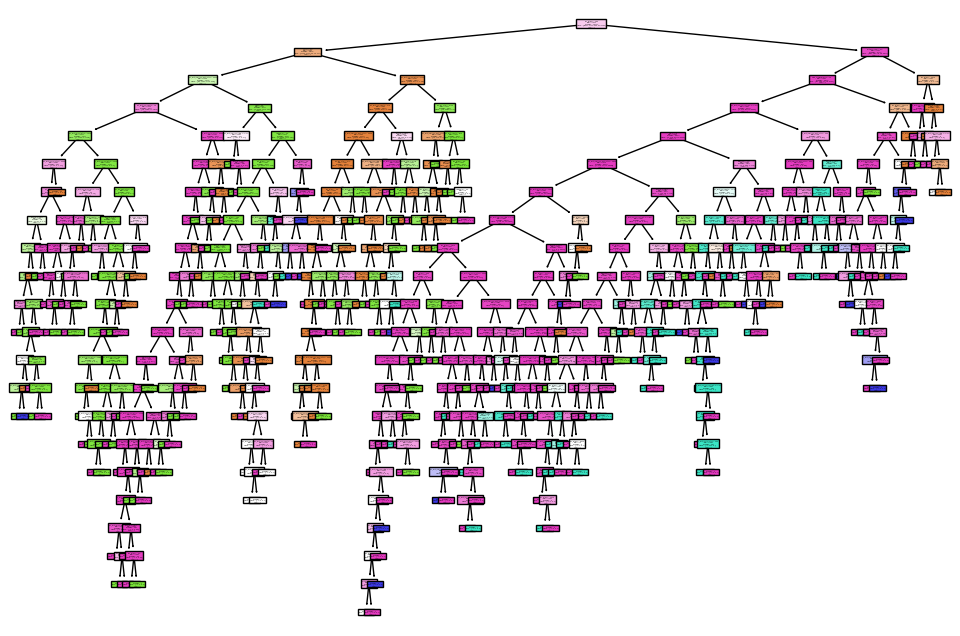

In [51]:
from sklearn import tree
#Affichage de l'arbre de décision graphique
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, feature_names=X_train.columns, class_names=Y_train.unique().astype(str), filled=True)
plt.show()

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Avantages et inconvénients:</strong> <br>
   + Faciles à comprendre et à interpréter visuellement. <br>
   + Aucune normalisation des données n'est nécessaire. <br>
   + Résilience aux outliers <br>
   - Les petits changements dans les données peuvent entraîner des variations importantes dans la structure de l'arbre, ce qui peut conduire à une   instabilité du modèle. <br>
    
    
   </div>

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
3.Algorithme Support Vector Machine</p><br>

<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Information:</strong> <br>

Les machines à vecteurs de support sont des modèles d'apprentissage supervisé utilisés pour la classification et la régression. <br>
L'objectif principal des SVM est de trouver un hyperplan optimal qui sépare les données en classes différentes.  <br>
Cet hyperplan est choisi de manière à maximiser la marge entre les classes, où la marge est la distance entre l'hyperplan et les points de données les plus proches de chaque classe, appelés vecteurs de support.
</div>

In [48]:
# Créer un modèle SVM
svm_model = SVC(kernel='poly')  
# Entraîner le modèle sur les données d'entraînement
svm_model.fit(X_train_selected_Normlized, Y_train_Normlized)

# Prédire les étiquettes pour les données de test
Y_pred_svm = svm_model.predict(X_test_selected_Normlized)

# Calculer la précision du modèle
accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f"Précision du modèle SVM : {accuracy :.2f}")


Précision du modèle SVM : 0.76


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    <strong>Avantages et inconvénients:</strong> <br>
   + Efficacité en dimension élevée. <br>
   + Flexibilité grâce aux noyaux . <br>
   - Sensibilité à la mise à l'échelle <br>
   - SVM est intensif en termes de calcul, surtout avec de grandes quantités de données. <br>
    
    
   </div>

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
4.Algorithme Logistic Regression</p><br>

In [49]:
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train_selected_Normlized, Y_train)

y_pred_LGR = logreg.predict(X_test_selected_Normlized)
accuracy = accuracy_score(Y_test, y_pred_LGR)

print(f"Précision du modèle Regression logistique : {accuracy :.2f}")


Précision du modèle Regression logistique : 0.76


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
5.Algorithme Bayes</p><br>

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn import metrics

# Création du modèle Naive Bayes
model = GaussianNB()

# Entraînement du modèle
model.fit(X_train_selected_Normlized, Y_train)

# Prédictions sur l'ensemble de test
y_pred_bayes = model.predict(X_test_selected_Normlized)

# Évaluation de la précision
accuracy = metrics.accuracy_score(Y_test, y_pred_bayes)
print("Précision du modèle : {:.2f}".format(accuracy))

Précision du modèle : 0.49


<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
VII. Evaluation </p><br>


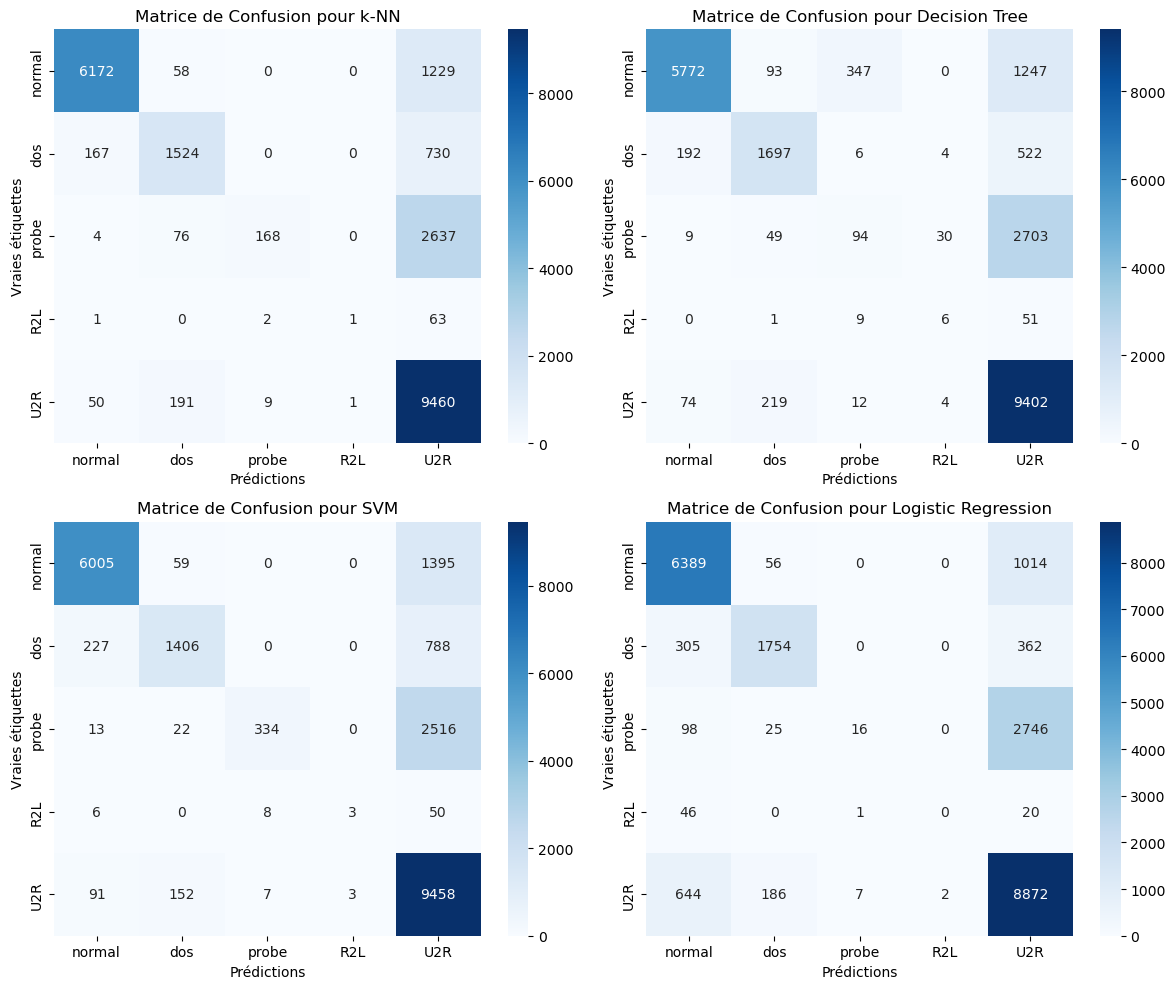

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['normal', 'dos', 'probe', 'R2L', 'U2R']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# k-NN
conf_matrix_knn = confusion_matrix(Y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0, 0])
axes[0, 0].set_title('Matrice de Confusion pour k-NN')
axes[0, 0].set_xlabel('Prédictions')
axes[0, 0].set_ylabel('Vraies étiquettes')

# Decision Tree
conf_matrix_dt = confusion_matrix(Y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0, 1])
axes[0, 1].set_title('Matrice de Confusion pour Decision Tree')
axes[0, 1].set_xlabel('Prédictions')
axes[0, 1].set_ylabel('Vraies étiquettes')

# SVM
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[1, 0])
axes[0, 2].set_title('Matrice de Confusion pour SVM')
axes[0, 2].set_xlabel('Prédictions')
axes[0, 2].set_ylabel('Vraies étiquettes')

# Logistic Regression
conf_matrix_lgr = confusion_matrix(Y_test, y_pred_LGR)
sns.heatmap(conf_matrix_lgr, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[1, 1])
axes[1, 0].set_title('Matrice de Confusion pour Logistic Regression')
axes[1, 0].set_xlabel('Prédictions')
axes[1, 0].set_ylabel('Vraies étiquettes')
# Random Forest
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
axes[1, 1].set_title('Matrice de Confusion pour Random Forest')
axes[1, 1].set_xlabel('Prédictions')
axes[1, 1].set_ylabel('Vraies étiquettes')
plt.show()

# XGBoost
conf_matrix_xgb = confusion_matrix(Y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
axes[1, 2].set_title('Matrice de Confusion pour XGBoost')
axes[1, 2].set_xlabel('Prédictions')
axes[1, 2].set_ylabel('Vraies étiquettes')
plt.show()

# Adjust layout
plt.tight_layout()
plt.show()


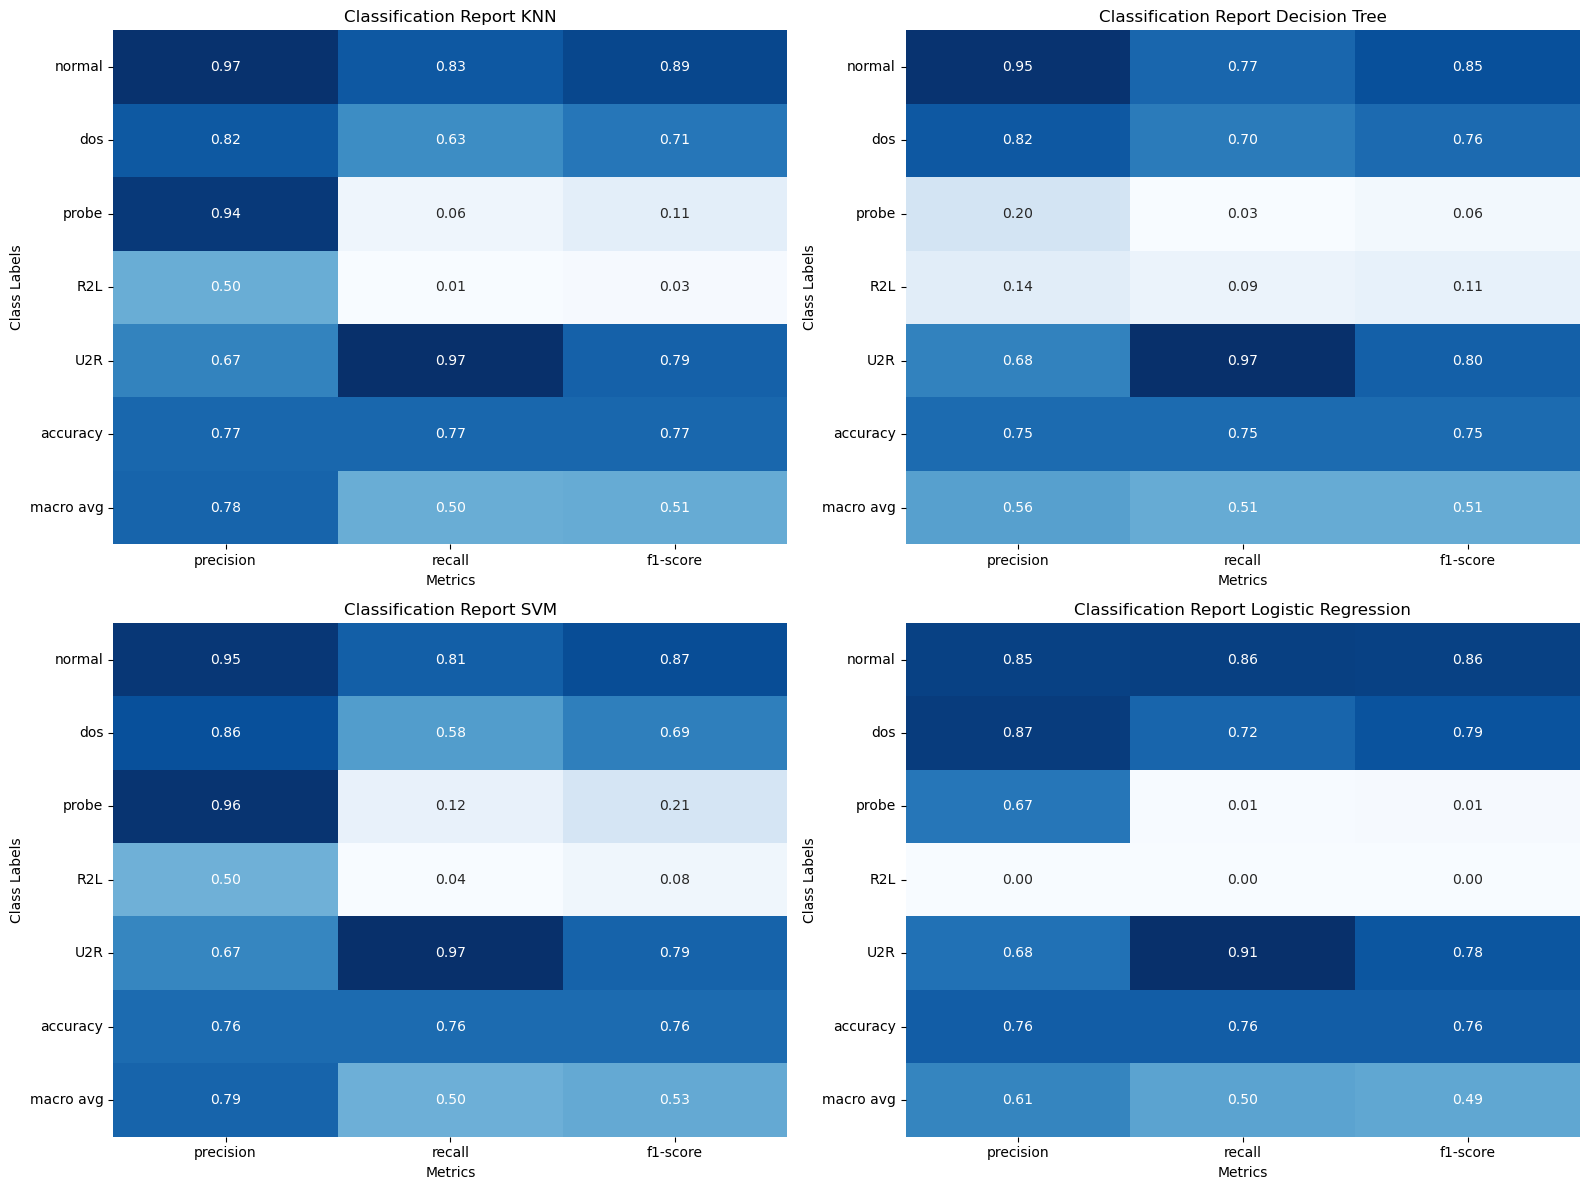

In [54]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

class_names = ['normal', 'dos', 'probe', 'R2L', 'U2R']

# KNN
class_report_knn = classification_report(Y_test, y_pred_knn, target_names=class_names, output_dict=True)
df_classification_report_knn = pd.DataFrame(class_report_knn).transpose()

# Decision Tree
class_report_dt = classification_report(Y_test, y_pred_dt, target_names=class_names, output_dict=True)
df_classification_report_dt = pd.DataFrame(class_report_dt).transpose()

# SVM
class_report_svm = classification_report(Y_test, Y_pred_svm, target_names=class_names, output_dict=True)
df_classification_report_svm = pd.DataFrame(class_report_svm).transpose()

# Logistic Regression
class_report_lgr = classification_report(Y_test, y_pred_LGR, target_names=class_names, output_dict=True)
df_classification_report_lgr = pd.DataFrame(class_report_lgr).transpose()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot KNN
sns.heatmap(df_classification_report_knn.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Classification Report KNN')
axes[0, 0].set_xlabel('Metrics')
axes[0, 0].set_ylabel('Class Labels')

# Plot Decision Tree
sns.heatmap(df_classification_report_dt.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('Classification Report Decision Tree')
axes[0, 1].set_xlabel('Metrics')
axes[0, 1].set_ylabel('Class Labels')

# Plot SVM
sns.heatmap(df_classification_report_svm.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('Classification Report SVM')
axes[1, 0].set_xlabel('Metrics')
axes[1, 0].set_ylabel('Class Labels')

# Plot Logistic Regression
sns.heatmap(df_classification_report_lgr.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title('Classification Report Logistic Regression')
axes[1, 1].set_xlabel('Metrics')
axes[1, 1].set_ylabel('Class Labels')

# Adjust layout
plt.tight_layout()
plt.show()


<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
VII. Deployement </p><br>


In [62]:
import pickle 

In [63]:
pickle.dump(knn_classifier,open('model_knn.pkl','wb'))